
Q-2 Implementation of K-Means from Scratch.
To predict optimum number of clusters and represent it visually.




In [32]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
import pandas as pd 
from sklearn import datasets
iris = datasets.load_iris()
df= pd.DataFrame(iris.data, columns = iris.feature_names)

In [33]:
cluster_array = df.to_numpy()
print(cluster_array[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [34]:
# Calculate Euclidean distance between two observations
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [35]:
k = 4
cluster_vars = []

centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))

for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))


0 71.0
1 32.0
2 25.0
3 20.0
4 19.0
5 19.0
6 19.0
7 19.0
8 18.0
9 18.0
10 18.0
11 18.0
12 18.0
13 18.0
14 18.0
15 18.0
16 18.0
17 18.0
18 18.0
19 18.0
20 18.0


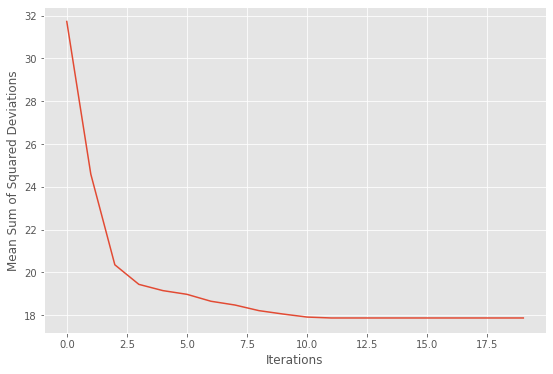

In [36]:
plt.subplots(figsize=(9,6))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations');
plt.savefig('mean_ssd', bpi=150)

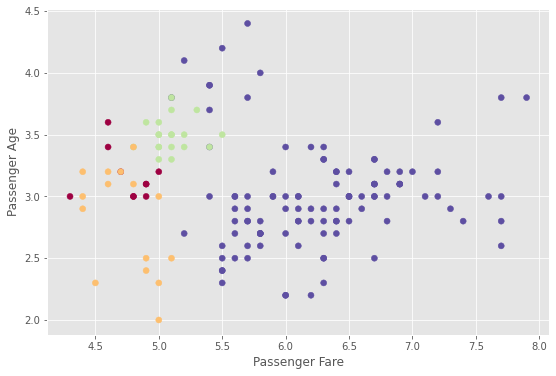

In [37]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=initial_clusters, cmap=plt.cm.Spectral);
plt.xlabel('Passenger Fare')
plt.ylabel('Passenger Age');
plt.savefig('initial_clusters', bpi=150)

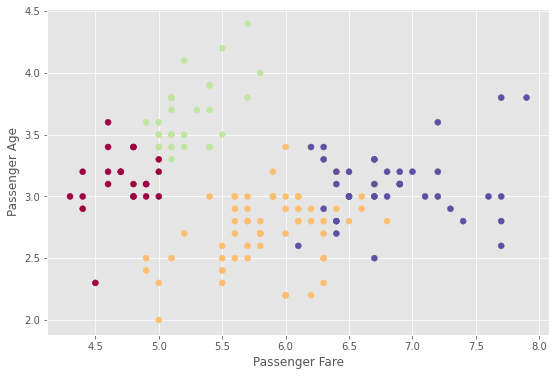

In [38]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap=plt.cm.Spectral);
plt.xlabel('Passenger Fare')
plt.ylabel('Passenger Age');
plt.savefig('final_clusters', bpi=150)